In [41]:
import numpy as np
import matplotlib.pyplot as plt


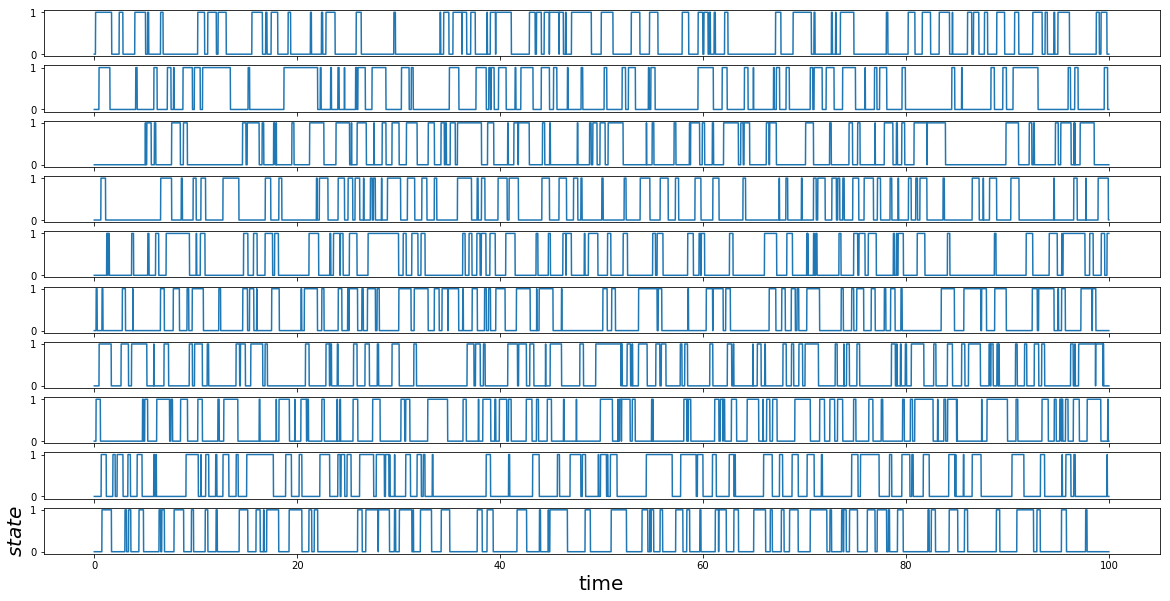

In [44]:
T = 100
n_processes = 10
n_time_steps = 10000
n_events_max = 1000

lambdas = [1, 2]
time_grid = np.linspace(0, T, n_time_steps)
ctmc_process = np.ones((n_time_steps, n_processes))

fontsize = 20
fig, axes = plt.subplots(n_processes, 1, figsize = (20, 10), sharex = True, sharey = True)

for j in range(n_processes):
    interrarival_times = [0]
    t = 0
    x = 0
    c = 0
    while t < T and c < n_events_max:
        i = int(t / T * (n_time_steps - 1))
        tau = np.random.exponential(scale = 1 / lambdas[x])
        ctmc_process[(time_grid >= t) & (time_grid < t + tau), j] = x
        t = t + tau
        x = 1 - x
        c += 1
    axes[j].plot(time_grid, ctmc_process[:, j])

axes[j].set_xlabel('time', fontsize = fontsize)
axes[j].set_ylabel('$state$', fontsize = fontsize);
    

In [45]:
# LONG RUN PROPORTION OF TIME SPENT IN EACH STATE

print('state 0 :', (ctmc_process == 0).mean(axis = 0))
print('state 1 :', (ctmc_process == 1).mean(axis = 0))

state 0 : [0.6386 0.6738 0.6616 0.7093 0.6898 0.6342 0.6701 0.6639 0.6589 0.6357]
state 1 : [0.3614 0.3262 0.3384 0.2907 0.3102 0.3658 0.3299 0.3361 0.3411 0.3643]
